# Playlist Overview

## Imports

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Connect to database

In [2]:
# Connect to the SQLite database
conn = sqlite3.connect('playlist_analysis.db')

# Run a query to get data from the `playlists` table
df_playlists = pd.read_sql_query("SELECT * FROM playlists;", conn)

# Show the DataFrame
print(df_playlists)

       playlist_id            p_name  p_num_tracks  p_num_albums  \
0                0        Throwbacks            52            47   
1                1  Awesome Playlist            39            23   
2                2           korean             64            51   
3                3               mat           126           107   
4                4               90s            17            16   
...            ...               ...           ...           ...   
24995        24995         Nostalgia            53            35   
24996        24996               USA            25            25   
24997        24997       Summer time            93            54   
24998        24998          SALSITA             50            42   
24999        24999       Winter 2016            18            18   

       p_num_followers  p_num_artists  p_duration_ms  p_num_edits  \
0                    1             37       11532414            6   
1                    1             21       1

## Check for missing values

In [3]:
# Check for missing values
missing_values = df_playlists.isnull().sum()
print(missing_values)

conn.close()

playlist_id        0
p_name             0
p_num_tracks       0
p_num_albums       0
p_num_followers    0
p_num_artists      0
p_duration_ms      0
p_num_edits        0
p_modified_at      0
p_collaborative    0
dtype: int64


## Distributuion of numerical attributes

The histograms give us a good sense of the distribution of various numerical attributes in the playlists table:
- __Number of Tracks__ (```p_num_tracks```): Most playlists have fewer than 50 tracks, with a few exceptions going up to around 125.
- __Number of Albums__ (```p_num_albums```): Similar to the number of tracks, most playlists feature albums from a limited range, mostly fewer than 50.
- __Number of Followers__ (```p_num_followers```): Almost all playlists have very few followers, indicating that these are likely personal playlists rather than public or viral ones.
- __Number of Artists__ (```p_num_artists```): Most playlists feature a variety of artists, generally ranging from 0 to 40.
- __Duration in ms__ (```p_duration_ms```): The duration of playlists varies widely, with most being concentrated below 20 million milliseconds (or approximately 5.5 hours).
- __Number of Edits__ (```p_num_edits```): Most playlists have undergone fewer than 10 edits.
- __Modified At__ (```p_modified_at```): This feature represents the Unix timestamp when the playlist was last modified. The data seems to be spread out, but it's hard to interpret this without converting it to a more readable date format.

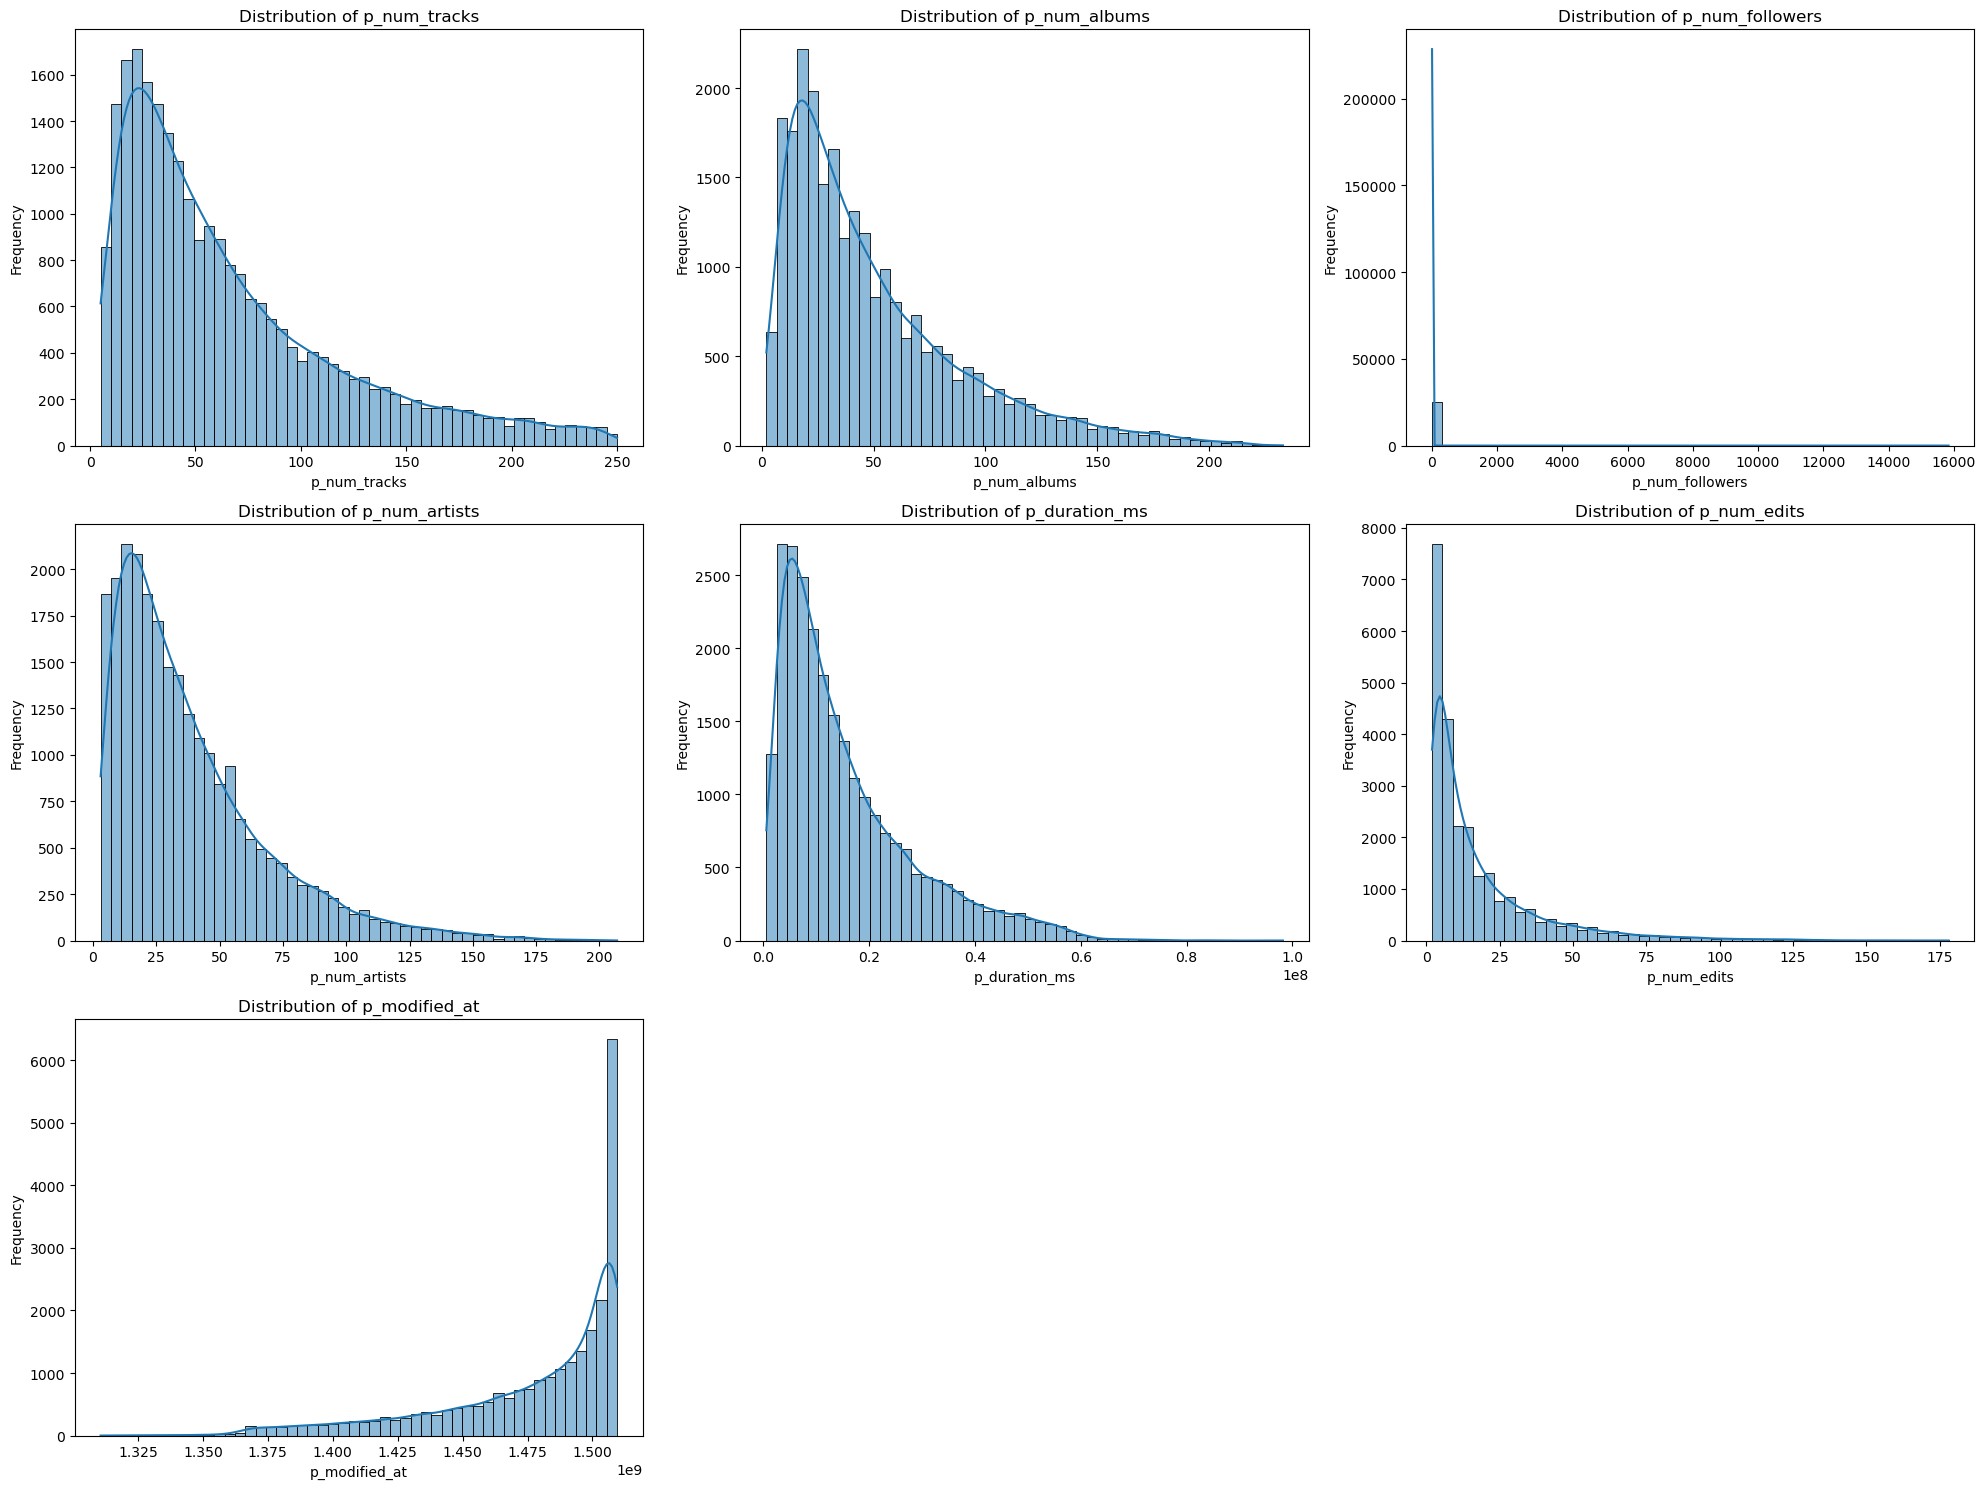

In [4]:
# Plotting histograms for numerical features in the playlists dataframe
numerical_features = ['p_num_tracks', 'p_num_albums', 'p_num_followers', 'p_num_artists', 'p_duration_ms', 'p_num_edits', 'p_modified_at']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_playlists[feature], bins=50, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Convert Unix Timestamp into Date

In [5]:
df_playlists['p_modified_at'] = pd.to_datetime(df_playlists['p_modified_at'], unit='s')
df_playlists

,playlist_id,p_name,p_num_tracks,p_num_albums,p_num_followers,p_num_artists,p_duration_ms,p_num_edits,p_modified_at,p_collaborative
0,0,Throwbacks,52,47,1,37,11532414,6,2017-04-29,false
1,1,Awesome Playlist,39,23,1,21,11656470,5,2017-09-28,false
2,2,korean,64,51,1,31,14039958,18,2017-09-18,false
3,3,mat,126,107,1,86,28926058,4,2017-07-26,false
4,4,90s,17,16,2,16,4335282,7,2014-06-02,false
...,...,...,...,...,...,...,...,...,...,...
24995,24995,Nostalgia,53,35,1,22,12901143,9,2017-02-11,false
24996,24996,USA,25,25,1,25,5760807,5,2014-07-10,false
24997,24997,Summer time,93,54,1,38,20263744,14,2017-02-27,false
24998,24998,SALSITA,50,42,1,22,14407672,18,2014-04-15,false


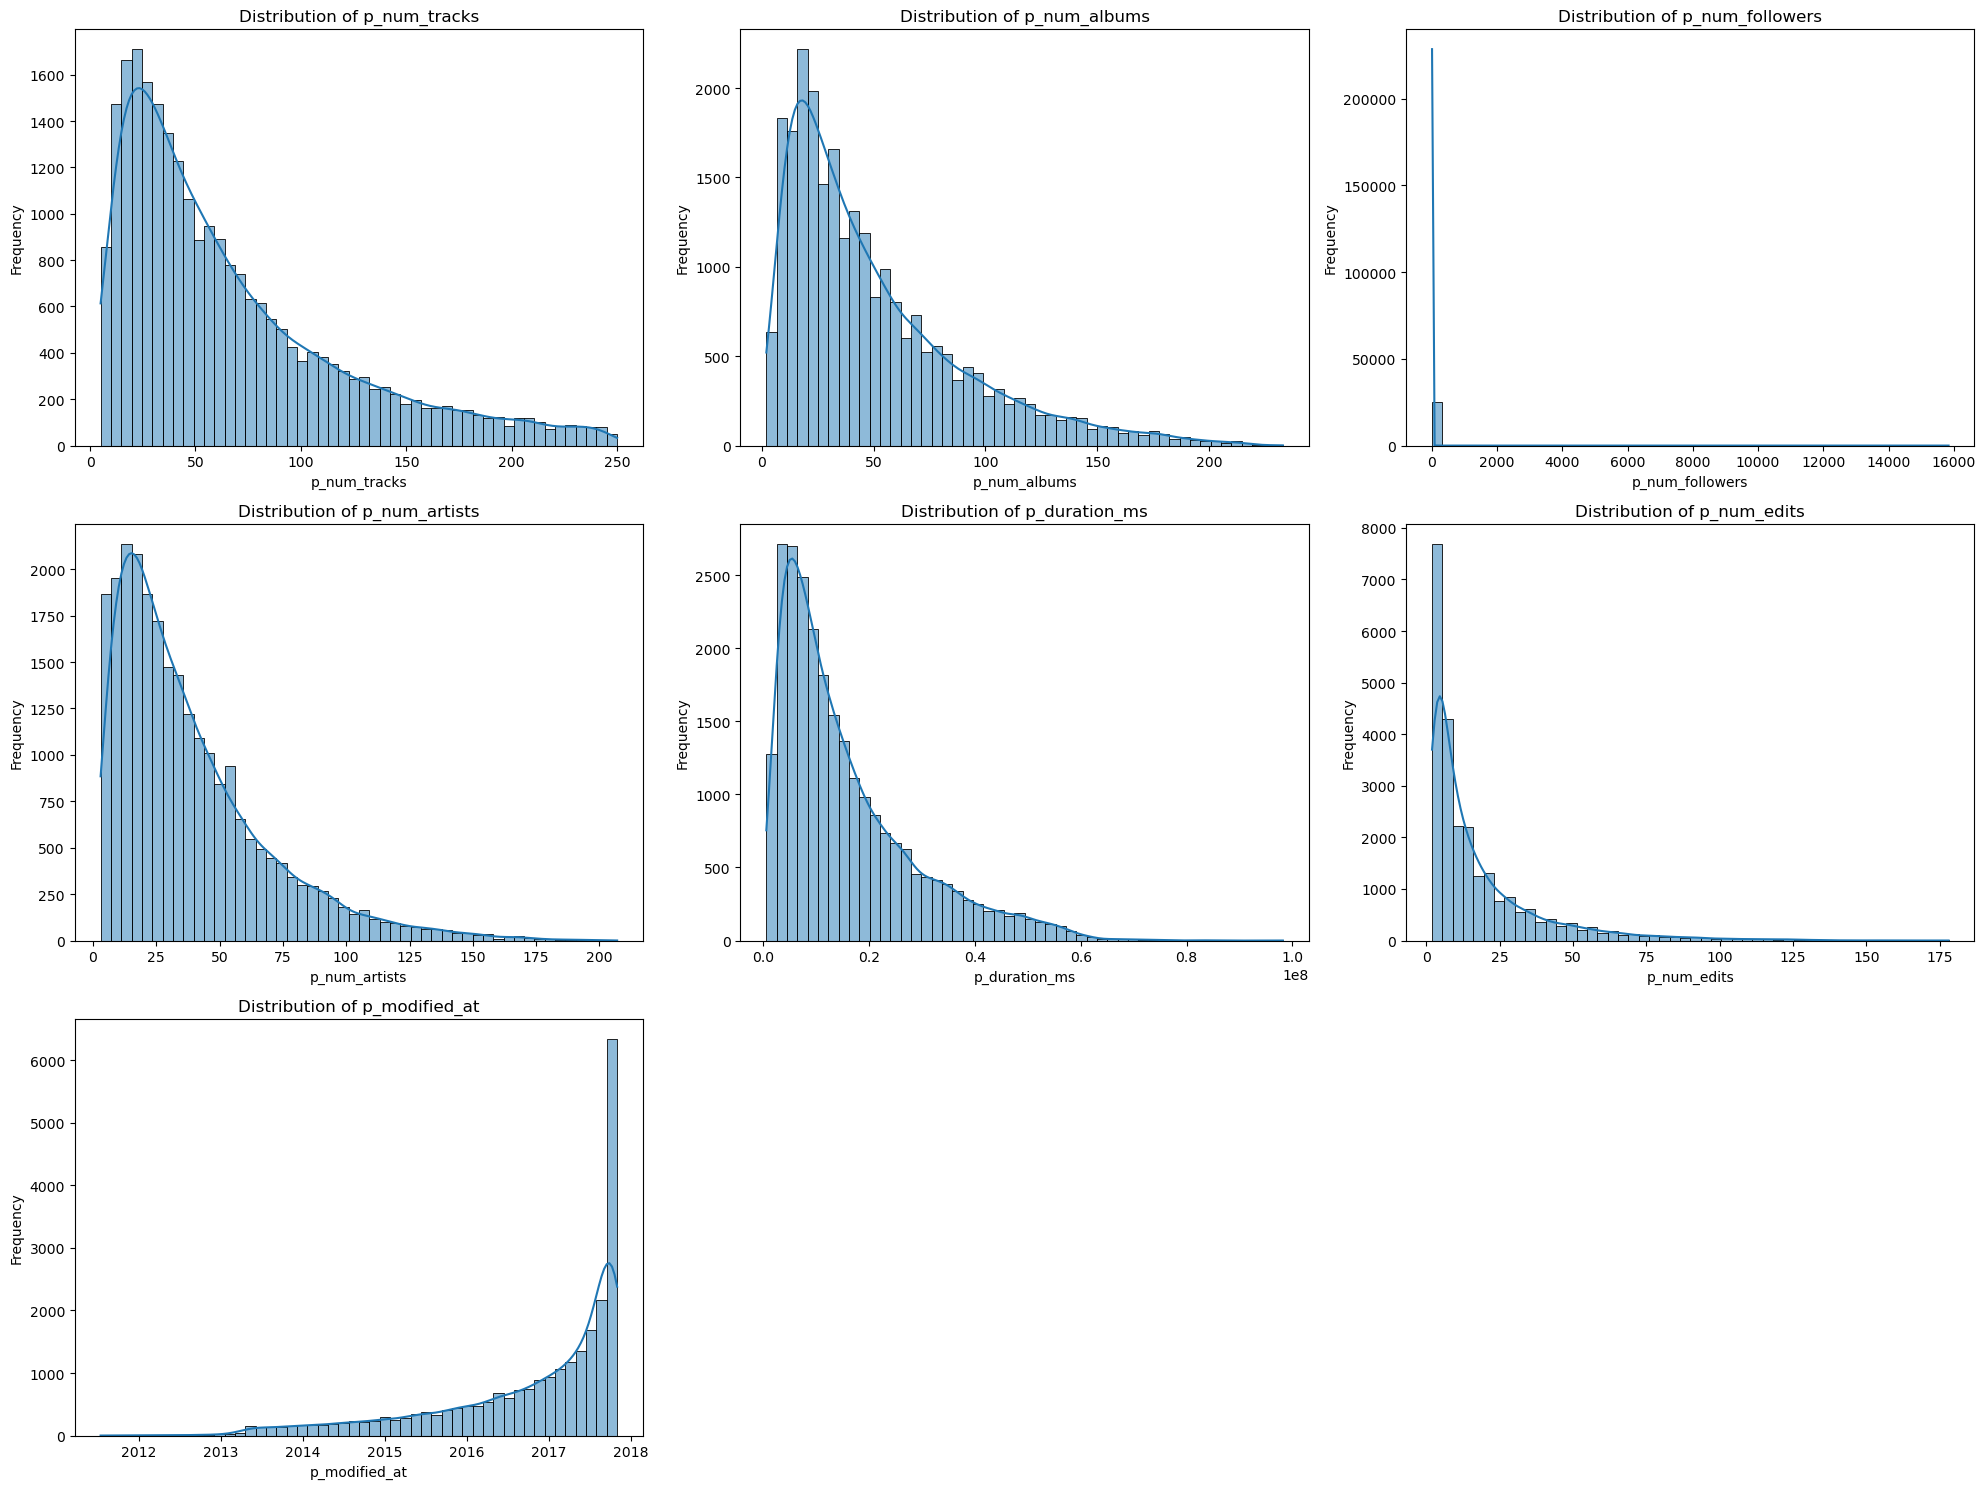

In [6]:
# Plotting histograms for numerical features in the playlists dataframe
numerical_features = ['p_num_tracks', 'p_num_albums', 'p_num_followers', 'p_num_artists', 'p_duration_ms', 'p_num_edits', 'p_modified_at']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_playlists[feature], bins=50, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Number of Tracks per Playlist

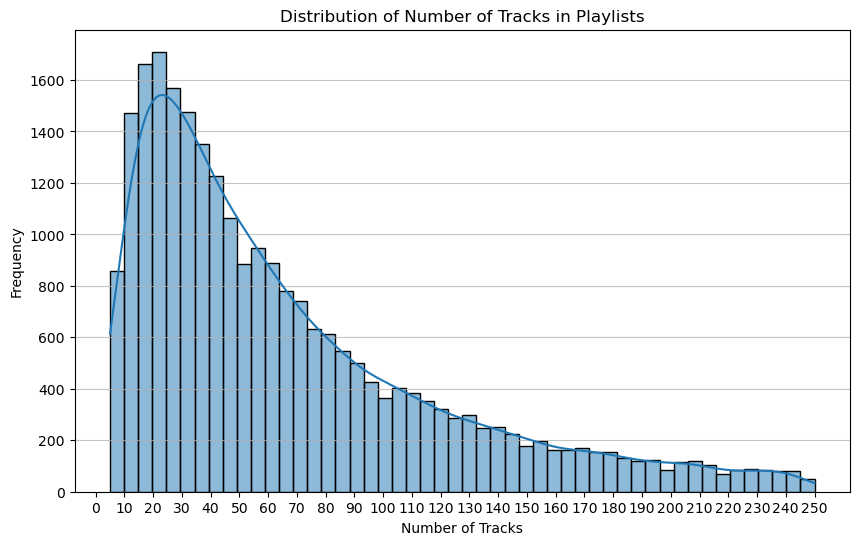

In [7]:
plt.figure(figsize=(10, 6))

sns.histplot(df_playlists['p_num_tracks'], bins=50, kde=True)
plt.title('Distribution of Number of Tracks in Playlists')
plt.xlabel('Number of Tracks')
plt.ylabel('Frequency')
plt.xticks(range(0, max(df_playlists['p_num_tracks']) + 1, 10))
plt.grid(axis='y', alpha=0.75)
plt.show()

## Most Popular Playlists by Number of Followers

In [8]:
most_popular_playlists = df_playlists.sort_values(by='p_num_followers', ascending=False)
most_popular_playlists[['playlist_id', 'p_name', 'p_num_followers']]

,playlist_id,p_name,p_num_followers
7215,7215,TOP POP,15842
17675,17675,raggaeton,2994
2957,2957,Now Playing,2699
18833,18833,in the clouds,1559
765,765,Tangled,1038
...,...,...,...
9504,9504,Yus,1
9503,9503,Memories,1
9502,9502,old country.,1
9501,9501,SB,1


In [9]:
most_popular_playlists = df_playlists.sort_values(by='p_num_followers', ascending=False).head(10)
most_popular_playlists[['playlist_id', 'p_name', 'p_num_followers']]

,playlist_id,p_name,p_num_followers
7215,7215,TOP POP,15842
17675,17675,raggaeton,2994
2957,2957,Now Playing,2699
18833,18833,in the clouds,1559
765,765,Tangled,1038
21486,21486,sad chill,448
14010,14010,august,307
24476,24476,Light,181
17695,17695,HAPPY,158
18659,18659,Country Christmas,142


In [10]:
# all with more than 1 follower
playlists_more_than_one_follower = df_playlists[df_playlists['p_num_followers'] > 1]
playlists_more_than_one_follower[['playlist_id', 'p_name', 'p_num_followers']].sort_values(by='p_num_followers', ascending=False)

,playlist_id,p_name,p_num_followers
7215,7215,TOP POP,15842
17675,17675,raggaeton,2994
2957,2957,Now Playing,2699
18833,18833,in the clouds,1559
765,765,Tangled,1038
...,...,...,...
10262,10262,Jasmine,2
10275,10275,Video,2
10278,10278,all time faves,2
10279,10279,sleep,2


# Average, Median, Standard Deviation of Playlist Attributes

In [11]:
# Calculate the average number of tracks per playlist
average_tracks = df_playlists['p_num_tracks'].mean()
print("Average tracks per Playlist: ", "%.2f" % average_tracks)

# Calculate the median number of tracks per playlist
median_tracks = df_playlists['p_num_tracks'].median()
print("Median tracks per Playlist: ", "%.2f" % median_tracks)

# Calculate the standard deviation of the number of tracks per playlist
std_tracks = df_playlists['p_num_tracks'].std()
print("Standard deviation of tracks per Playlist: ", "%.2f" % std_tracks)

Average tracks per Playlist:  66.80
Median tracks per Playlist:  50.00
Standard deviation of tracks per Playlist:  53.75


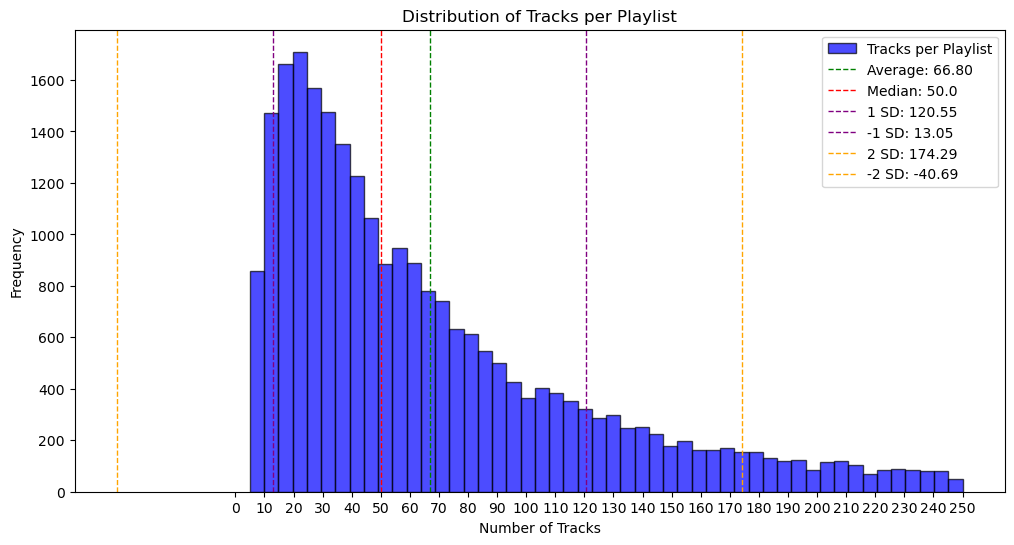

In [12]:
# Create histogram
plt.figure(figsize=(12, 6))
plt.hist(df_playlists['p_num_tracks'], bins=50, alpha=0.7, label='Tracks per Playlist', color='blue', edgecolor='black')

# Add mean, median, and standard deviation lines
plt.axvline(average_tracks, color='green', linestyle='dashed', linewidth=1, label=f'Average: {average_tracks:.2f}')
plt.axvline(median_tracks, color='red', linestyle='dashed', linewidth=1, label=f'Median: {median_tracks}')
plt.axvline(average_tracks + std_tracks, color='purple', linestyle='dashed', linewidth=1, label=f'1 SD: {average_tracks + std_tracks:.2f}')
plt.axvline(average_tracks - std_tracks, color='purple', linestyle='dashed', linewidth=1, label=f'-1 SD: {average_tracks - std_tracks:.2f}')
plt.axvline(average_tracks + 2*std_tracks, color='orange', linestyle='dashed', linewidth=1, label=f'2 SD: {average_tracks + 2*std_tracks:.2f}')
plt.axvline(average_tracks - 2*std_tracks, color='orange', linestyle='dashed', linewidth=1, label=f'-2 SD: {average_tracks - 2*std_tracks:.2f}')

# Add labels and title
plt.xlabel('Number of Tracks')
plt.ylabel('Frequency')
plt.xticks(range(0, max(df_playlists['p_num_tracks']) + 1, 10))
plt.title('Distribution of Tracks per Playlist')
plt.legend()

# Show the plot
plt.show()

## Number of Albums per Playlist

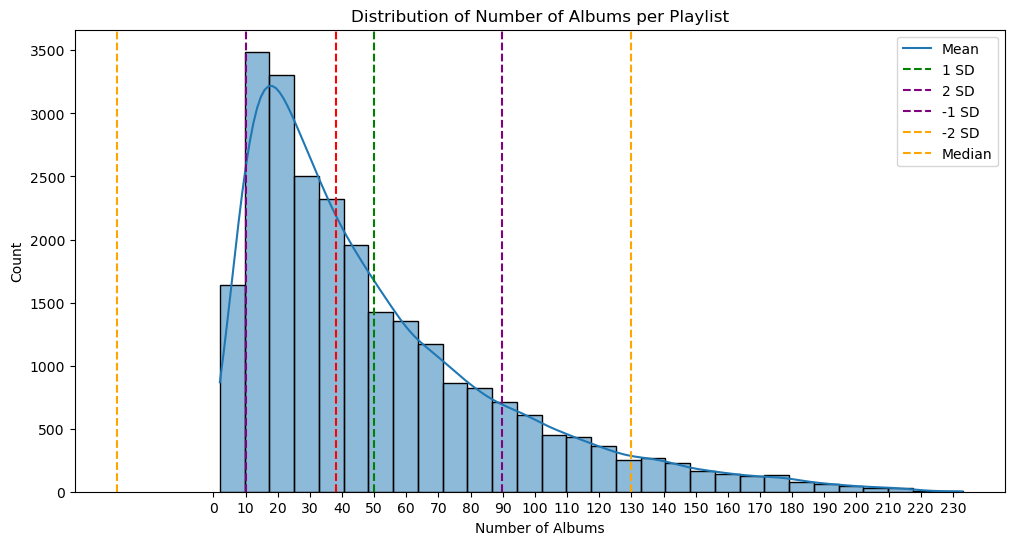

In [13]:
# Let's create a function to plot these histograms with KDE and standard deviation lines
def plot_hist_with_std(df, column, bins=30, xlabel='', title=''):
    plt.figure(figsize=(12, 6))
    sns.histplot(df[column], bins=bins, kde=True)
    
    mean_val = df[column].mean()
    median_val = df[column].median()
    std_val = df[column].std()
    
    plt.axvline(mean_val, color='green', linestyle='--')
    plt.axvline(mean_val + std_val, color='purple', linestyle='--')
    plt.axvline(mean_val - std_val, color='purple', linestyle='--')
    plt.axvline(mean_val + 2*std_val, color='orange', linestyle='--')
    plt.axvline(mean_val - 2*std_val, color='orange', linestyle='--')
    plt.axvline(median_val, color='red', linestyle='--')

    
    # Add mean, median, and standard deviation lines

    plt.xlabel(xlabel)
    plt.xticks(range(0, max(df_playlists['p_num_albums']) + 1, 10))
    plt.title(title)
    plt.legend({'Mean':mean_val, '1 SD': mean_val + std_val, '2 SD': mean_val + 2*std_val, '-1 SD': mean_val - std_val, '-2 SD': mean_val - 2*std_val, 'Median': median_val, })
    plt.show()

# Plotting the distribution of the number of albums per playlist
plot_hist_with_std(df_playlists, 'p_num_albums', xlabel='Number of Albums', title='Distribution of Number of Albums per Playlist')


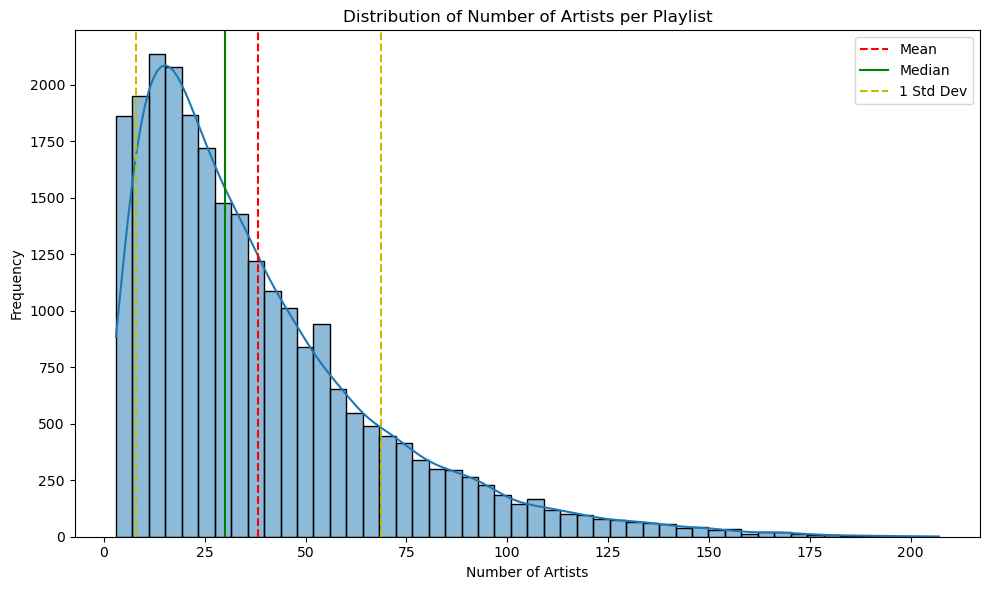

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the figure size and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Histogram for the number of artists
sns.histplot(df_playlists['p_num_artists'], bins=50, kde=True, ax=ax)
ax.axvline(df_playlists['p_num_artists'].mean(), color='r', linestyle='--', label='Mean')
ax.axvline(df_playlists['p_num_artists'].median(), color='g', linestyle='-', label='Median')
std = df_playlists['p_num_artists'].std()
ax.axvline(df_playlists['p_num_artists'].mean() - std, color='y', linestyle='--', label='1 Std Dev')
ax.axvline(df_playlists['p_num_artists'].mean() + std, color='y', linestyle='--')

# Setting titles and labels
ax.set_title('Distribution of Number of Artists per Playlist')
ax.set_xlabel('Number of Artists')
ax.set_ylabel('Frequency')

# Adding a legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

In many real-world datasets, the distribution of values can be heavily skewed, meaning there are a few extremely high or low values. In this case, most playlists have a few followers, but a handful have thousands. When you plot this data on a regular scale, the few extreme values can dominate the graph, making it hard to see the pattern among the more typical, smaller values.

A logarithmic scale can be a good alternative in such cases. Instead of increasing by a constant amount, each "tick" on the log scale increases by a factor (e.g., 10x). This allows you to view both ends of the distribution more clearly.

Here's a simplified example:
    Regular Scale: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, ..., 1000
    Log Scale: 1, 10, 100, 1000

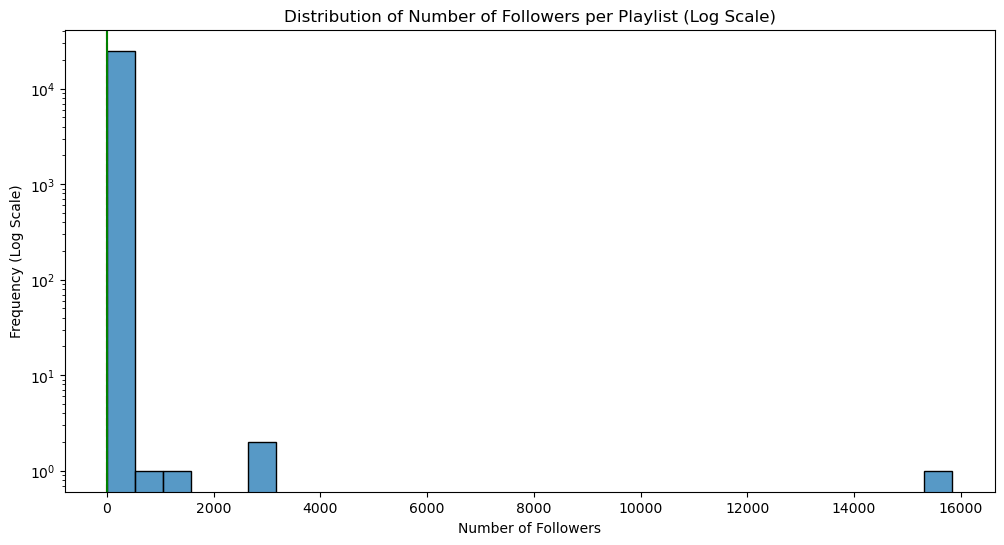

In [15]:
plt.figure(figsize=(12, 6))
sns.histplot(df_playlists['p_num_followers'], bins=30, kde=False)
plt.yscale('log')
plt.axvline(df_playlists['p_num_followers'].mean(), color='red', linestyle='--')
plt.axvline(df_playlists['p_num_followers'].median(), color='green', linestyle='-')
plt.title('Distribution of Number of Followers per Playlist (Log Scale)')
plt.xlabel('Number of Followers')
plt.ylabel('Frequency (Log Scale)')
plt.show()

In [16]:
conn = sqlite3.connect('playlist_analysis.db')
max_follower = pd.read_sql_query("SELECT MAX(p_num_followers) FROM playlists;", conn)

distribution_followers = pd.read_sql_query("SELECT p_num_followers, COUNT(*) as frequency FROM playlists GROUP BY p_num_followers ORDER BY frequency DESC;", conn)
conn.close()
max_follower, distribution_followers

(   MAX(p_num_followers)
 0                 15842,
     p_num_followers  frequency
 0                 1      18903
 1                 2       3638
 2                 3       1228
 3                 4        512
 4                 5        253
 ..              ...        ...
 59               26          1
 60               25          1
 61               24          1
 62               23          1
 63               19          1
 
 [64 rows x 2 columns])

## Tracks in playlists

In [17]:
# Connect to the SQLite database
conn = sqlite3.connect('playlist_analysis.db')
cur = conn.cursor()

cur.execute("ALTER TABLE playlists ADD COLUMN p_duration_hours REAL;")
cur.execute("ALTER TABLE playlists ADD COLUMN p_duration_minutes REAL;")


# 1 hour = 3,600,000 milliseconds
cur.execute("UPDATE playlists SET p_duration_hours = p_duration_ms / 3600000.0;")

# 1 minute = 60,000 milliseconds
cur.execute("UPDATE playlists SET p_duration_minutes = p_duration_ms / 60000.0;")

# Commit the changes and close the connection
conn.commit()
conn.close()

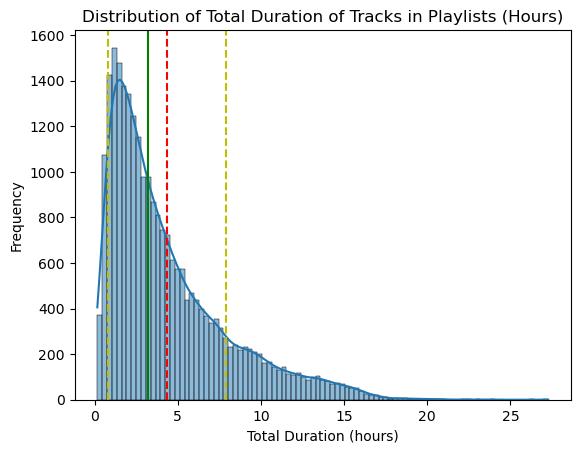

Average total duration of tracks per playlist: 4.35 h
Median total duration of tracks per playlist: 3.23 h
Standard deviation of total duration of tracks per playlist: 3.57 h
Minimum total duration of tracks per playlist: 0.16 h
Maximum total duration of tracks per playlist: 27.27 h


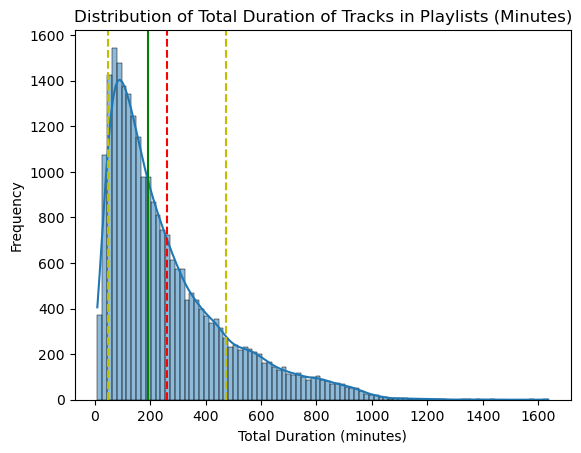

Average total duration of tracks per playlist: 261.24 min
Median total duration of tracks per playlist: 193.51 min
Standard deviation of total duration of tracks per playlist: 214.12 min
Minimum total duration of tracks per playlist: 9.52 min
Maximum total duration of tracks per playlist: 1636.47 min


In [18]:
# Connect to the database
conn = sqlite3.connect('playlist_analysis.db')
df_durations = pd.read_sql_query("SELECT p_duration_ms FROM playlists;", conn)
conn.close()

# Convert duration to hours and minutes
df_durations['p_duration_hours'] = df_durations['p_duration_ms'] / (1000 * 60 * 60)
df_durations['p_duration_minutes'] = df_durations['p_duration_ms'] / (1000 * 60)

# Plot for hours
sns.histplot(df_durations['p_duration_hours'], kde=True)
plt.axvline(df_durations['p_duration_hours'].mean(), color='r', linestyle='--')
plt.axvline(df_durations['p_duration_hours'].median(), color='g', linestyle='-')
std_hours = df_durations['p_duration_hours'].std()
plt.axvline(df_durations['p_duration_hours'].mean() - std_hours, color='y', linestyle='--')
plt.axvline(df_durations['p_duration_hours'].mean() + std_hours, color='y', linestyle='--')
plt.title('Distribution of Total Duration of Tracks in Playlists (Hours)')
plt.xlabel('Total Duration (hours)')
plt.ylabel('Frequency')
plt.show()

# Stats for hours
print(f"Average total duration of tracks per playlist: {df_durations['p_duration_hours'].mean():.2f} h")
print(f"Median total duration of tracks per playlist: {df_durations['p_duration_hours'].median():.2f} h")
print(f"Standard deviation of total duration of tracks per playlist: {std_hours:.2f} h")
print(f"Minimum total duration of tracks per playlist: {df_durations['p_duration_hours'].min():.2f} h")
print(f"Maximum total duration of tracks per playlist: {df_durations['p_duration_hours'].max():.2f} h")


# Plot for minutes
sns.histplot(df_durations['p_duration_minutes'], kde=True)
plt.axvline(df_durations['p_duration_minutes'].mean(), color='r', linestyle='--')
plt.axvline(df_durations['p_duration_minutes'].median(), color='g', linestyle='-')
std_minutes = df_durations['p_duration_minutes'].std()
plt.axvline(df_durations['p_duration_minutes'].mean() - std_minutes, color='y', linestyle='--')
plt.axvline(df_durations['p_duration_minutes'].mean() + std_minutes, color='y', linestyle='--')
plt.title('Distribution of Total Duration of Tracks in Playlists (Minutes)')
plt.xlabel('Total Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

# Stats for minutes
print(f"Average total duration of tracks per playlist: {df_durations['p_duration_minutes'].mean():.2f} min")
print(f"Median total duration of tracks per playlist: {df_durations['p_duration_minutes'].median():.2f} min")
print(f"Standard deviation of total duration of tracks per playlist: {std_minutes:.2f} min")
print(f"Minimum total duration of tracks per playlist: {df_durations['p_duration_minutes'].min():.2f} min")
print(f"Maximum total duration of tracks per playlist: {df_durations['p_duration_minutes'].max():.2f} min")

## Number of Edits per Playlist

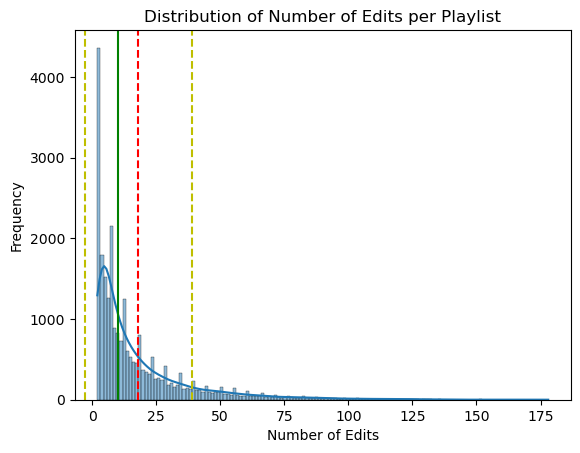

Average number of edits per playlist: 17.94
Median number of edits per playlist: 10.00
Standard deviation of number of edits per playlist: 20.86
Minimum number of edits per playlist: 2
Maximum number of edits per playlist: 178


In [19]:
# Let's create a histogram for the number of edits per playlist
conn = sqlite3.connect('playlist_analysis.db')
df_edits = pd.read_sql_query("SELECT p_num_edits FROM playlists;", conn)
conn.close()

sns.histplot(df_edits['p_num_edits'], kde=True)
plt.axvline(df_edits['p_num_edits'].mean(), color='r', linestyle='--')
plt.axvline(df_edits['p_num_edits'].median(), color='g', linestyle='-')
std = df_edits['p_num_edits'].std()
plt.axvline(df_edits['p_num_edits'].mean() - std, color='y', linestyle='--')
plt.axvline(df_edits['p_num_edits'].mean() + std, color='y', linestyle='--')
plt.title('Distribution of Number of Edits per Playlist')
plt.xlabel('Number of Edits')
plt.ylabel('Frequency')
plt.show()

mean_edits = df_edits['p_num_edits'].mean()
median_edits = df_edits['p_num_edits'].median()
std_edits = df_edits['p_num_edits'].std()
min_edits = df_edits['p_num_edits'].min()
max_edits = df_edits['p_num_edits'].max()


print(f"Average number of edits per playlist: {mean_edits:.2f}")
print(f"Median number of edits per playlist: {median_edits:.2f}")
print(f"Standard deviation of number of edits per playlist: {std_edits:.2f}")
print(f"Minimum number of edits per playlist: {min_edits}")
print(f"Maximum number of edits per playlist: {max_edits}")

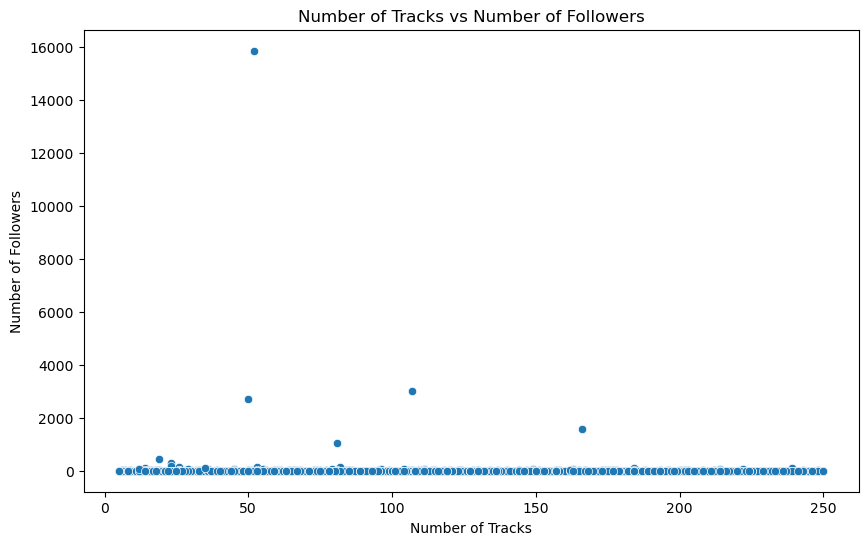

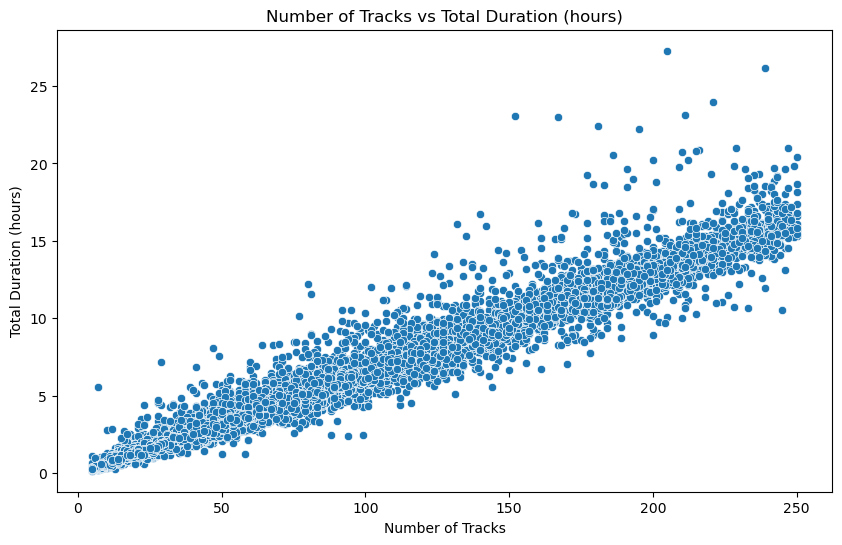

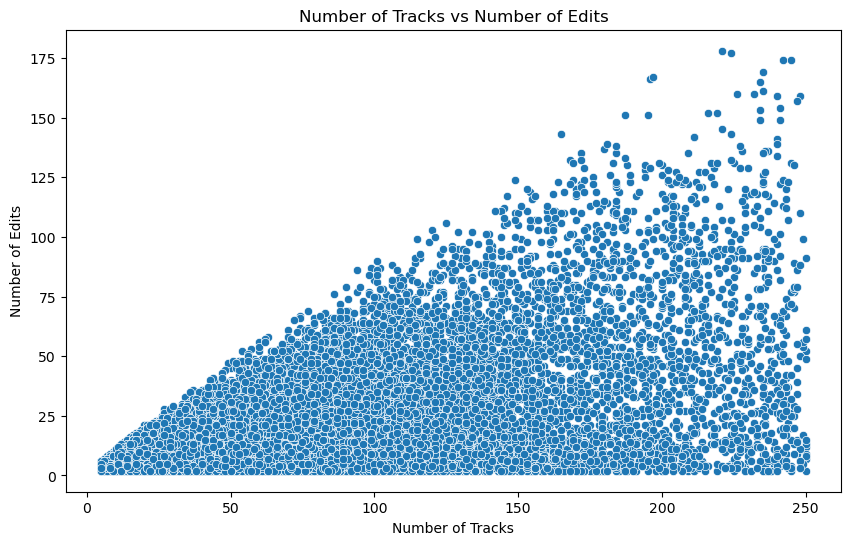

In [20]:
# Connect to the SQLite database
conn = sqlite3.connect('playlist_analysis.db')

# Run a query to get up to date data from the `playlists` table
df_playlists = pd.read_sql_query("SELECT * FROM playlists;", conn)

# Relationship between Number of Tracks and Number of Followers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='p_num_tracks', y='p_num_followers', data=df_playlists)
plt.title('Number of Tracks vs Number of Followers')
plt.xlabel('Number of Tracks')
plt.ylabel('Number of Followers')
plt.show()

# Relationship between Number of Tracks and Total Duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='p_num_tracks', y='p_duration_hours', data=df_playlists)
plt.title('Number of Tracks vs Total Duration (hours)')
plt.xlabel('Number of Tracks')
plt.ylabel('Total Duration (hours)')
plt.show()

# Relationship between Number of Tracks and Number of Edits
plt.figure(figsize=(10, 6))
sns.scatterplot(x='p_num_tracks', y='p_num_edits', data=df_playlists)
plt.title('Number of Tracks vs Number of Edits')
plt.xlabel('Number of Tracks')
plt.ylabel('Number of Edits')
plt.show()

In [21]:
# most popular genre per playlist

# Connect to the SQLite database
conn = sqlite3.connect('playlist_analysis.db')

# Run a query to get up to date data from the `playlists` table
df_playlists = pd.read_sql_query("SELECT * FROM playlists;", conn)

# Run a query to get up to date data from the `playlist_tracks` table
df_playlist_tracks = pd.read_sql_query("SELECT * FROM playlist_tracks;", conn)

# Run a query to get up to date data from the `tracks` table
df_tracks = pd.read_sql_query("SELECT * FROM tracks;", conn)

